# Módulo 10 atividade 1

In [11]:
# Carregando pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [12]:
# Carregando arquivo CSV em um dataframe
df = pd.read_csv('previsao_de_renda.csv')

df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

# Exibindo as primeiras linhas do dataframe
print(df.head())

# Plotando a matriz de dispersão para avaliação das correlações entre as variáveis
sns.pairplot(df)
plt.show()

# Calculando a matriz de correlações
correlation_matrix = df.corr()

# Plotando a matriz de correlações em um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlações')
plt.show()

     data_ref sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos   
0  2015-01-01    F             False             True           1  \
1  2015-01-01    M              True             True           0   
2  2015-01-01    M              True             True           2   
3  2015-01-01    F              True            False           0   
4  2015-01-01    M             False            False           0   

    tipo_renda           educacao estado_civil tipo_residencia  idade   
0  Assalariado         Secundário       Casado            Casa     36  \
1   Empresário         Secundário       Casado            Casa     42   
2  Assalariado  Superior completo       Casado            Casa     31   
3   Empresário         Secundário       Casado            Casa     50   
4  Assalariado         Secundário       Casado            Casa     52   

   tempo_emprego  qt_pessoas_residencia    mau    renda  
0       3.575342                    3.0  False  3369.24  
1       0.860274              

Parece que pode haver algum aspecto que estou  deixando passar, mas, ao analisar os dados, as correlações não parecem fazer sentido para mim. Isso é evidenciado tanto nos gráficos de dispersão quanto no mapa de calor. As correlações mais fortes, como [qtd_filhos + qtd_pessoas_residencia], são intuitivas, pois é esperado que mais filhos estejam associados a mais pessoas na residência. Da mesma forma, [idade + tempo_emprego] também segue um padrão previsível, uma vez que o aumento da idade geralmente está relacionado a um aumento no tempo de emprego.

A única correlação que se destaca minimamente é [renda + tempo_emprego], mas mesmo essa correlação é relativamente fraca, com um coeficiente de 0.39. As demais relações não parecem ter uma explicação clara ou significativa para mim neste contexto.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [ ]:
# Calcular a matriz de correlações
correlation_matrix = df.corr()

# Identificar as duas variáveis mais correlacionadas com "renda"
correlation_with_renda = correlation_matrix['renda'].sort_values(ascending=False)
top_2_correlated_vars = correlation_with_renda.index[1:3]

# Plotar o scatterplot das duas variáveis mais correlacionadas com "renda"
sns.scatterplot(x=top_2_correlated_vars[0], y=top_2_correlated_vars[1], data=df)
plt.xlabel(top_2_correlated_vars[0])
plt.ylabel(top_2_correlated_vars[1])
plt.title(f"Scatterplot entre {top_2_correlated_vars[0]} e {top_2_correlated_vars[1]} em relação à renda")
plt.show()

3) Na sua opinião, há outliers na variável renda?

In [15]:
# Calculando estatísticas descritivas da variável "renda"
desc_stats = df['renda'].describe()

# Exibindo as estatísticas descritivas
print(desc_stats)

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64


Podemos observar sim. Ao analisar a média, maximo e mínimo, nota-se que o valor mínimo 159.9 é bem inferior a média 4624 e que o valor máximo é drasticamente superior (89918).

4) Calcule o logaritmo da variável renda e repita a sequência de análise

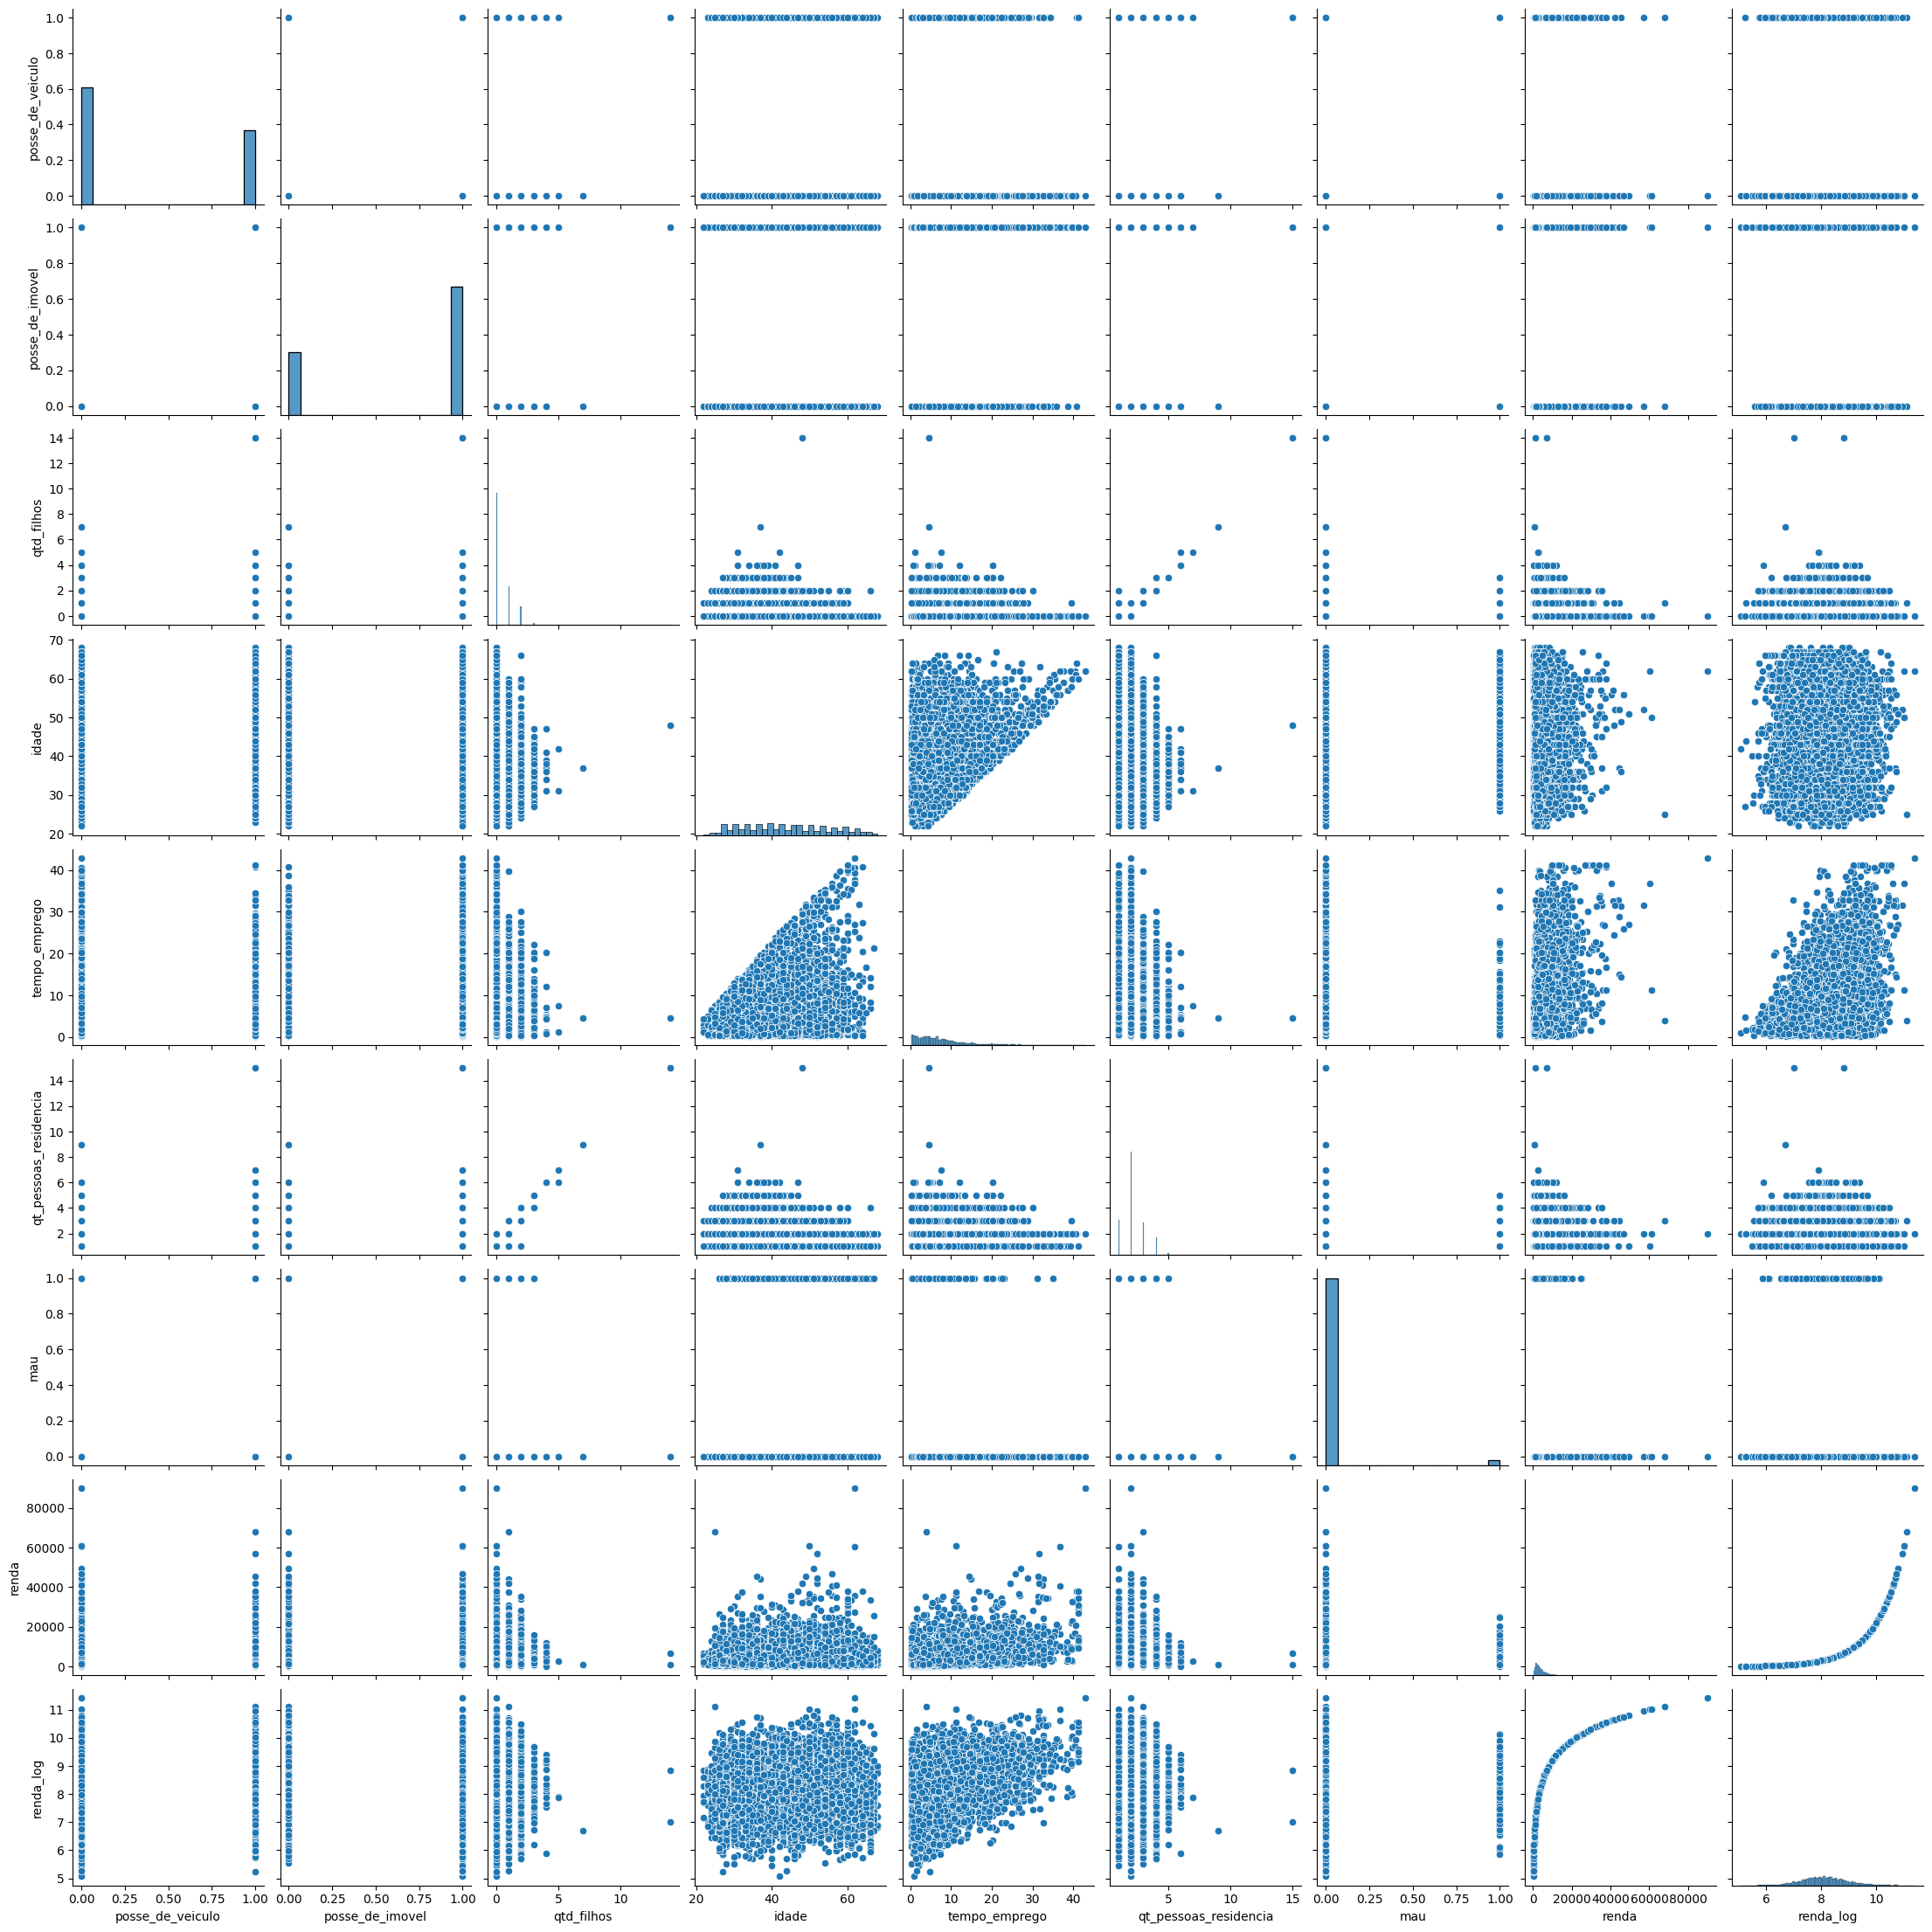

ValueError: could not convert string to float: '2015-01-01'

In [20]:
# Calculando o logaritmo da variável "renda"
df['renda_log'] = df['renda'].apply(lambda x: None if x <= 0 else round(math.log(x), 2))

# df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

# Avaliando a estrutura de correlação das variáveis quantitativas através de um gráfico de matriz de dispersão
sns.pairplot(df)
plt.show()

# Calculando a matriz de correlações
correlation_matrix = df.corr()

# Plotando a matriz de correlações em um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlações')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

O Mapa de Calor continua com poucas modificações, mas sem dúvidas alguns dos gráficos estão mais aptos a serem interpretados, como por exemplo [tempo_emprego + renda_log]